# SGD Algorithm to predict movie ratings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from scipy.sparse import csr_matrix
from sklearn.utils.extmath import randomized_svd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Normalizer

In [3]:
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [4]:
data.shape

(89992, 3)

In [5]:
print("Total no of ratings :", data.shape[0])
print("Total No of Users   :", len(np.unique(data['user_id'])))
print("Total No of movies  :", len(np.unique(data['item_id'])))

Total no of ratings : 89992
Total No of Users   : 943
Total No of movies  : 1662


**Create your adjacency matrix**

In [6]:
#creating sparse matrix in form csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
adjacency_matrix = csr_matrix((data['rating'].values, ( data['user_id'].values, data['item_id'].values )),)

In [7]:
adjacency_matrix.shape

(943, 1681)

**SVD Decompostion**

In [ ]:
# Using adjacency_matrix as matrix for SVD decompostion

u, sigma, v=randomized_svd(adjacency_matrix, n_components=500, n_iter=10)

In [11]:
print('The size of U matrix is ', u.shape)
print('The size of Sigma matrix is ', sigma.shape)
print('The size of V Transpose is  matrix is ', v.T.shape)

The size of U matrix is  (943, 500)
The size of Sigma matrix is  (500,)
The size of V Transpose is  matrix is  (1681, 500)


**Computing mean of ratings**

In [ ]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    
    mean_u=data['rating'].mean(axis=0)

    return mean_u

In [ ]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


**Initialize $B_{i}$ and $C_{j}$**

In [ ]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    vec=[0]*dim
  
    return vec 

In [ ]:
dim= adjacency_matrix.shape[0]
b_i=initialize(dim)


In [ ]:
dim= adjacency_matrix.shape[1]
c_j=initialize(dim)

**Compute dL/db_i**

In [ ]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''

    reg= 2 * alpha * ( b_i[user_id] )
    loss= 2 * ( rating - mu - b_i[user_id] - c_j[item_id] - np.dot( U[user_id] , V[:,item_id].T ) )
    db=reg-loss

    return db


**Compute dL/dc_j**

In [ ]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''

    reg1= 2 * alpha * ( c_j[user_id] )
    loss1= 2 * ( rating - mu - b_i[user_id] - c_j[item_id] - np.dot( U[user_id] , V[:,item_id].T ) )
    dc=reg1-loss1 

    return dc 


**Compute MSE (mean squared error) for predicted ratings**

In [ ]:
learning_rate=0.001
alpha=0.01
epochs=15
mse_list=[]

#initializing the weights
b_i=initialize(adjacency_matrix.shape[0])
c_j=initialize(adjacency_matrix.shape[1])

for epoch in range(epochs):
  print('Epoch number',epoch)
  #storing the predicted values 
  y_predict_list=[]
  #storing actual ratings
  y_actual=[] 

  #updating weight using SGD 
  #for each user_id and movie_id pair
  for user_id, item_id in zip(*adjacency_matrix.nonzero()):
     
    rating = adjacency_matrix[user_id , item_id]
    #calculating derivatives for weights updates
    db = derivative_db(user_id, item_id, rating , u, v, mu, alpha)
    dc = derivative_dc(user_id, item_id, rating , u, v, mu, alpha)

    #updating the weights
    b_i[user_id] = b_i[user_id] - (learning_rate * db)
    c_j[item_id] = c_j[item_id] - (learning_rate * dc)


  #predicting the ratings and caculating mean_squared_error
  #for each user_id and movie_id pair
  for user_id, item_id in zip(*adjacency_matrix.nonzero()):
    
    y_actual.append( adjacency_matrix[user_id , item_id] )
    y_pred = mu + b_i[user_id] + c_j[item_id] + np.dot( u[user_id] , v[:,item_id].T)
    y_predict_list.append(y_pred)

  mse=mean_squared_error(y_actual, y_predict_list)
  mse_list.append(mse)

print('\n\nThe minimum value of MSE is ', min(mse_list))

Epoch number 0
Epoch number 1
Epoch number 2
Epoch number 3
Epoch number 4
Epoch number 5
Epoch number 6
Epoch number 7
Epoch number 8
Epoch number 9
Epoch number 10
Epoch number 11
Epoch number 12
Epoch number 13
Epoch number 14


The minimum value of MSE is  0.8328758482612092


**Plot epoch number vs MSE**

* epoch number on X-axis
* MSE on Y-axis

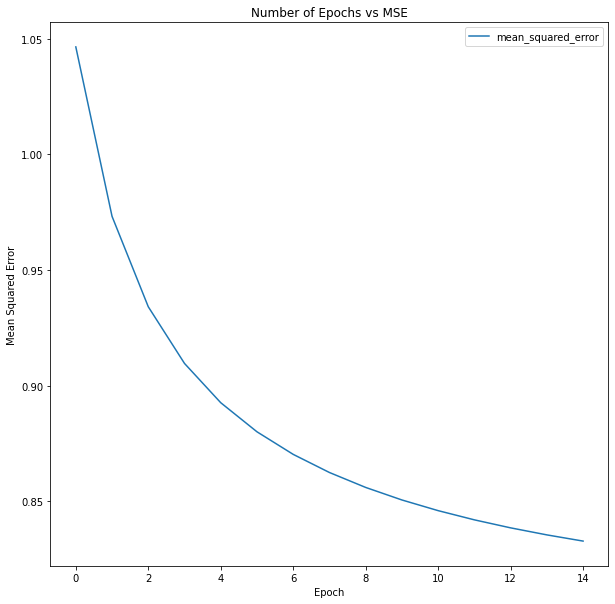

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(epochs), mse_list, label='mean_squared_error')
plt.title('Number of Epochs vs MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

**Observations:** 

- As the number of epochs increases the Mean Squared Error value decreases.

- The minimum value of MSE is 0.832875

**Scaling U and V matrix**

In [ ]:
norm1=Normalizer()
new_u=norm1.fit_transform(u)

norm2=Normalizer()
new_v=norm2.fit_transform(v)

**Checking if MSE value gets affected after scaling U and V matrix**

In [ ]:
learning_rate=0.001
alpha=0.01
epochs=15
mse_list1=[]

#initializing the weights
b_i=initialize(adjacency_matrix.shape[0])
c_j=initialize(adjacency_matrix.shape[1])

for epoch in range(epochs):
  print('Epoch number',epoch)
  #storing the predicted values 
  y_predict_list=[]
  #storing actual ratings
  y_actual=[] 

  #updating weight using SGD 
  #for each user_id and movie_id pair
  for user_id, item_id in zip(*adjacency_matrix.nonzero()):
     
    rating = adjacency_matrix[user_id , item_id]
    #calculating derivatives for weights updates
    db = derivative_db(user_id, item_id, rating , new_u, new_v, mu, alpha)
    dc = derivative_dc(user_id, item_id, rating , new_u, new_v, mu, alpha)

    #updating the weights
    b_i[user_id] = b_i[user_id] - (learning_rate * db)
    c_j[item_id] = c_j[item_id] - (learning_rate * dc)


  #predicting the ratings and caculating mean_squared_error
  #for each user_id and movie_id pair
  for user_id, item_id in zip(*adjacency_matrix.nonzero()):
    
    y_actual.append( adjacency_matrix[user_id , item_id] )
    y_pred = mu + b_i[user_id] + c_j[item_id] + np.dot( new_u[user_id] , new_v[:,item_id].T)
    y_predict_list.append(y_pred)

  mse=mean_squared_error(y_actual, y_predict_list)
  mse_list1.append(mse)

print('\n\nThe minimum value of MSE is ', min(mse_list1))

Epoch number 0
Epoch number 1
Epoch number 2
Epoch number 3
Epoch number 4
Epoch number 5
Epoch number 6
Epoch number 7
Epoch number 8
Epoch number 9
Epoch number 10
Epoch number 11
Epoch number 12
Epoch number 13
Epoch number 14


The minimum value of MSE is  0.824354541350863


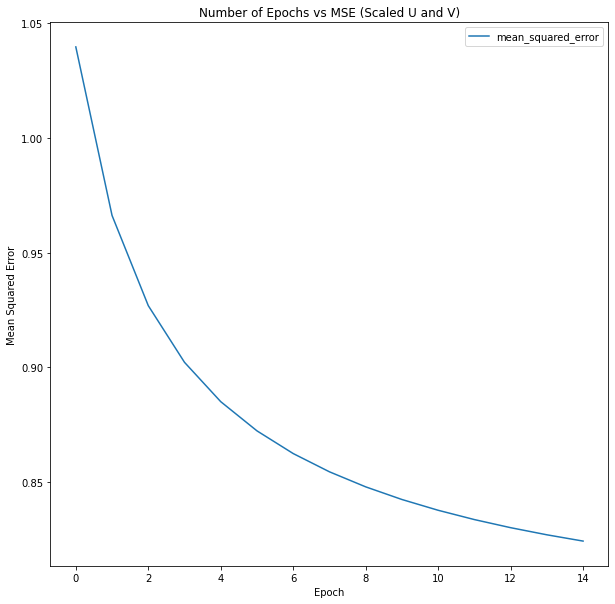

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(epochs), mse_list1, label='mean_squared_error')
plt.title('Number of Epochs vs MSE (Scaled U and V)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

**Observations:** 

- As the number of epochs increases the Mean Squared Error value decreases.

- After scaling the U and V matrix, we can observe a slight decrease in the MSE value.

- The minimum value of MSE is 0.82435

<br>

In [12]:
#reading the data
userdf=pd.read_csv('/content/drive/MyDrive/AAIC Assignments/Assignment15_Recommendations_System_SGD-SVD/user_info.csv.txt')

In [13]:
userdf.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [14]:
userdf['is_male'].value_counts()

1    670
0    273
Name: is_male, dtype: int64

**Observation:** We have 670 males and 273 non-males users in the list giving ratings

In [15]:
print('The size of User feature matrix is ', u.shape)

The size of User feature matrix is  (943, 500)


In [16]:
y=userdf['is_male']    #getting the is_male column
print('The length of target variable is ', len(y))

The length of target variable is  943


In [18]:
x=userdf.drop('is_male', axis=1)

In [19]:
x.head()

,user_id,age,orig_user_id
0,0,24,1
1,1,53,2
2,2,23,3
3,3,24,4
4,4,33,5


**now using logistic regression for binary classification**

In [23]:
#using SGDClassifier with log loss
clf = SGDClassifier(learning_rate='optimal',loss='log',penalty='l2', alpha=0.0001, verbose=2, eta0=0.001)
clf.fit(u,y)

-- Epoch 1
Norm: 68.21, NNZs: 500, Bias: -2.781939, T: 943, Avg. loss: 1.443744
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 61.31, NNZs: 500, Bias: -4.143720, T: 1886, Avg. loss: 0.612474
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 55.96, NNZs: 500, Bias: 3.054253, T: 2829, Avg. loss: 0.451985
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 52.39, NNZs: 500, Bias: 2.300667, T: 3772, Avg. loss: 0.395306
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 50.27, NNZs: 500, Bias: 1.475401, T: 4715, Avg. loss: 0.352301
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 48.42, NNZs: 500, Bias: 1.394619, T: 5658, Avg. loss: 0.342470
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 47.17, NNZs: 500, Bias: 0.628576, T: 6601, Avg. loss: 0.336257
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 46.21, NNZs: 500, Bias: 1.435296, T: 7544, Avg. loss: 0.334987
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 45.51, NNZs: 500, Bias: 0.538650, T: 8487, Avg. loss: 0.329873

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=2, warm_start=False)

In [24]:
#predicting whether a given user from the user features matrix is male or not 
y_pred = clf.predict(u)

In [ ]:
male_count=0
not_male_count=0

for i in y_pred:
  if i==1:
    male_count+=1
  else:
    not_male_count+=1

print('The number of male count is ', male_count)
print('The number of not male count is ', not_male_count)

The number of male count is  717
The number of not male count is  226


**Observations:** We can observe that User Features that we have learnt on the basis of the ratings given for movies are able to classify gender.

### Summary

- We can learn user and movie matrix using matrix Factorisation ( Support Vector Decomposition) Truncated SVD

- We have B and C vectors as well optimised with help fo SGD

- Using all 4 features\weights learnt, ratings are predicted.

- As the number of epochs increases the Mean Squared Error value decreases.

- The minimum value of MSE is 0.832875 for U and V without scalling.

- After scaling U and V, we can observe a slight change in the minimum value of MSE with 0.82435.

- We can have also checked if Computed User feature matrix is gender biased and turns out it is. The number of features predicted as males are 717 and 226 as non-males. 